In [24]:
### Trustpilot data scraping module 
## Imports
from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
from wordcloud import WordCloud, STOPWORDS
import random


In [11]:
# Initialize lists
review_titles = []
review_dates_original = []
review_dates = []
review_ratings = []
review_texts = []
page_number = []

# Set Trustpilot page numbers to scrape here
from_page = 1
to_page = 10


In [14]:
for i in range(from_page, to_page + 1):
    response = requests.get(f"https://dk.trustpilot.com/review/www.alka.dk?page={i}")
    web_page = response.text
    soup = BeautifulSoup(web_page, "html.parser")

    for review in soup.find_all(class_ = "paper_paper__1PY90 paper_square__lJX8a card_card__lQWDv card_noPadding__D8PcU styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ"):
        # Review titles
        review_title = review.find(class_ = "typography_typography__QgicV typography_h4__E971J typography_color-black__5LYEn typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3 styles_reviewTitle__04VGJ")
        review_titles.append(review_title.getText())

        # Review ratings
        review_rating = review.find(class_ = "styles_reviewHeader__iU9Px")
        review_ratings.append(review_rating["data-service-review-rating"])
        
        # When there is no review text, append "" instead of skipping so that data remains in sequence with other review data e.g. review_title
        review_text = review.find(class_ = "typography_typography__QgicV typography_body__9UBeQ typography_color-black__5LYEn typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3")
        if review_text == None:
            review_texts.append("")
        else:
            review_texts.append(review_text.getText())
        
        # Trustpilot page number
        page_number.append(i)

# Create final dataframe from lists
df_reviews = pd.DataFrame(list(zip(review_titles, review_ratings, review_texts, page_number)),
                columns =['review_title', 'review_rating', 'review_text', 'page_number'])

In [15]:
df_reviews

,review_title,review_rating,review_text,page_number
0,Vores nabo er igang med at få byggede…,2,Vores nabo er igang med at få byggede et nyt h...,1
1,God service,5,God og hurtig service,1
2,Fin og hurtig hjælp.,5,Efter positiv telefon kontakt fik jeg samme da...,1
3,Super forsikringselskab,5,,1
4,Anmeldte lørdag i påsken,5,"Anmeldte lørdag i påsken, fik svar tirsdag eft...",1
...,...,...,...,...
395,Grim og nedladende tone,1,Grim og nedladende tone. Udvalgt til yderliger...,10
396,god behandling og forslag til omkring…,5,god behandling og forslag til omkring de forsi...,10
397,Behalige med arbejder at snakke med,5,,10
398,Altid god behandling,5,,10


In [18]:
df_reviews['review_title'] = df_reviews['review_title'].apply(lambda x: GoogleTranslator(source='auto').translate(x, dest='en'))
df_reviews['review_text'] = df_reviews['review_text'].apply(lambda x: GoogleTranslator(source='auto').translate(x, dest='en'))

In [19]:
# save dataframe as a pickle file
df_reviews.to_pickle('dataAlka_10pages.pkl')
df_reviews

,review_title,review_rating,review_text,page_number
0,Our neighbor is getting built…,2,Our neighbor is in the process of building a n...,1
1,God service,5,Good and fast service,1
2,Nice and quick help.,5,"After positive phone contact, I received a gif...",1
3,Super insurance company,5,,1
4,Reviewed Saturday at Easter,5,"Reviewed Saturday at Easter, got response Tues...",1
...,...,...,...,...
395,Ugly and condescending tone,1,Ugly and condescending tone. Selected for furt...,10
396,good treatment and suggestions for around…,5,good treatment and suggestions for about the i...,10
397,Behalige with works to talk to,5,,10
398,Always good treatment,5,,10


In [20]:
df = pd.read_pickle('dataAlka_10pages.pkl')
df['review_rating']=pd.to_numeric(df['review_rating'])
df[df['review_rating']<4]

,review_title,review_rating,review_text,page_number
0,Our neighbor is getting built…,2,Our neighbor is in the process of building a n...,1
12,Personal injury,1,I have a personal injury that has not been tre...,1
16,Would not recommend any Alka…,1,Will not recommended any Alka insurance they d...,1
25,Waiting and waiting🤬,1,Now waiting for almost 9 months to receive the...,2
26,Adjusts the prices as it suits them,1,"Adjust the prices as it suits them, it's a goo...",2
34,Not quite straight.,1,Alka has increased my premium by over 50% afte...,2
41,We have unfortunately had a water damage in…,1,We have unfortunately had a water damage in ou...,3
44,I have had insurance with Alka…,2,I have had insurance with Alka since 2016 and ...,3
54,Poorly prepared phone call,2,"The person who called me was very hesitant, an...",3
76,Have been with Alka for many years,3,"Have been with Alka for many years, they have ...",4


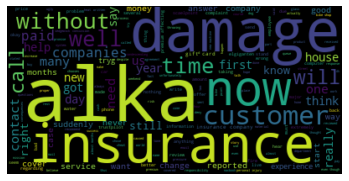

In [39]:
#filter the df to one candidate, and create a list of responses from them
text = df[df['review_rating']<4].review_text.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

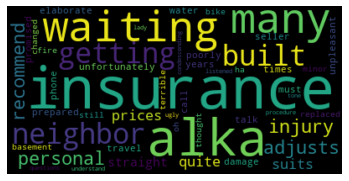

In [40]:
#filter the df to one candidate, and create a list of responses from them
text = df[df['review_rating']<4].review_title.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

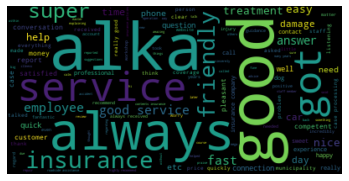

In [34]:
#filter the df to one candidate, and create a list of responses from them
text = df[df['review_rating']>4].dropna().review_text.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

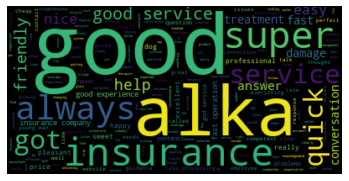

In [41]:
#filter the df to one candidate, and create a list of responses from them
text = df[df['review_rating']>4].dropna().review_title.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()